# Faster than training from scratch 
# Fine-tuning the English GPT-2 in any language with Hugging Face and fastai v2 

> Tutorial on how to use fastai v2 over Hugging Face's Transformers and Tokenizers libraries to fine-tune an English pre-trained transformer-based language model (GPT-2) to any language other than English

Notebook is based on work of Pierre Guillou (https://www.linkedin.com/in/pierreguillou)

Other resources used:
---


- Post in medium: [Faster than training from scratch - Fine-tuning the English GPT-2 in any language with Hugging Face and fastai v2 (practical case with Portuguese)](https://medium.com/@pierre_guillou/faster-than-training-from-scratch-fine-tuning-the-english-gpt-2-in-any-language-with-hugging-f2ec05c98787)
- Fast notebook: [finetuning-English-GPT2-any-language-Portuguese-HuggingFace-fastaiv2_FAST.ipynb](https://github.com/piegu/fastai-projects/blob/master/finetuning-English-GPT2-any-language-Portuguese-HuggingFace-fastaiv2_FAST.ipynb)
- Hugging face model page of [GPorTuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese): a language model for Portuguese text generation (and more NLP tasks...)
- Other posts in medium of the GPT-2 series: 
  - [NLP & fastai | GPT-2](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28)
  - [Byte-level BPE, an universal tokenizer but...](https://medium.com/@pierre_guillou/byte-level-bpe-an-universal-tokenizer-but-aff932332ffe)

## Overview

In this tutorial, instead of training from scratch, we will see how to fine-tune in just over a day, on one GPU and with a little more than 1GB of training data an English pre-trained [transformer](https://arxiv.org/abs/1706.03762)-based language model to any another language. 

As a practical case, we fine-tune to Portuguese the [English pre-trained GPT-2](https://github.com/openai/gpt-2) by wrapping the [Transformers](https://github.com/huggingface/transformers) and [Tokenizers](https://github.com/huggingface/tokenizers) libraries of Hugging Face into [fastai v2](https://github.com/fastai/fastai2). We thus create a new language model: [GPorTuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese), a language model for Portuguese text generation (and more NLP tasks...).

![The 3 main steps of fine-tuning the English GPT-2 to Portuguese with Hugging Face and fastai v2 (image edited from fast.ai NLP)](images/GPT2_tf_ft_approach.png "The 3 main steps of fine-tuning the English GPT-2 to Portuguese with Hugging Face and fastai v2 (image edited from fast.ai NLP)")

## About the choice of GPT-2

In order to demonstrate the feasibility of fine-tuning Hugging Face models via fastai v2, we had to choose an emblematic model of the [Transformer revolution](https://arxiv.org/abs/1706.03762) in the NLP since 2017.

Thus, between the GPT-2 and [BERT](https://github.com/google-research/bert) models, we chose the GPT-2 model because it has strongly influenced minds beyond the circle of Deep Learning specialists in early 2019 by [writing texts of a quality level close to that of humans](https://openai.com/blog/better-language-models/#samples). Today "exceeded" in number of parameters and performance by more recent models like BART, T5 and of course GPT-3 (175 billion parameters!), it remains a reference and a model used in research and applications.
For those you want to understand better how GPT-2 works, read the following posts:
- [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
- [NLP & fastai | GPT-2](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28)

**About the version of GPT-2**

There are 3 versions of the GPT-2 model (look at the [transformers documentation](https://huggingface.co/transformers/pretrained_models.html) for more details). Here, **we use the small version**, the one with the smallest number of weights (124 millions, not 117 as written in the original paper) but you can change the model used by changing the content of `pretrained_weights` (if it's not a GPT2 model, you'll need to change the classes used for the model and the tokenizer of course).

**More about GPT-2**

Source: https://huggingface.co/transformers/model_doc/gpt2.html

> OpenAI GPT-2 model was proposed in [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf) by Alec Radford*, Jeffrey Wu*, Rewon Child, David Luan, Dario Amodei** and Ilya Sutskever**. It’s a causal (unidirectional) transformer pre-trained using language modeling on a very large corpus of ~40 GB of text data.

> The abstract from the paper is the following: *GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.*

> Tips:
> - GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.
> - GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.
> - The PyTorch models can take the past as input, which is the previously computed key/value attention pairs. Using this past value prevents the model from re-computing pre-computed values in the context of text generation. See [reusing the past in generative models](https://huggingface.co/transformers/quickstart.html#using-the-past) for more information on the usage of this argument.

> [Write With Transformer](https://transformer.huggingface.co/doc/gpt2-large) is a webapp created and hosted by Hugging Face showcasing the generative capabilities of several models. GPT-2 is one of them and is available in five different sizes: small, medium, large, xl and a distilled version of the small checkpoint: distilgpt-2.

>The original code can be found [here](https://openai.com/blog/better-language-models/).

## References

### GPT-2

- Understanding
  - [Better Language Models and Their Implications](https://openai.com/blog/better-language-models/) (OpenAI, 02/14/2019)
  - [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
  - [The Annotated GPT-2](https://amaarora.github.io/2020/02/18/annotatedGPT2.html)
  - [Understanding the GPT-2 Source Code](https://medium.com/analytics-vidhya/understanding-the-gpt-2-source-code-part-1-4481328ee10b)
  - [How To Make Custom AI-Generated Text With GPT-2](https://minimaxir.com/2019/09/howto-gpt2/)
- Online Apps
  - [Write With Transformer (distilgpt2-small, gpt2small, gpt2medium, gpt2large)](https://transformer.huggingface.co/doc/gpt2-large)
  - [Write With DistilGPT-2](https://transformer.huggingface.co/model/distil-gpt2)
  - [Generate custom text from an AI using GPT-2 (using the 117M default model)](https://minimaxir.com/apps/gpt2-small/)
  - [Allen GPT2 Large Demo](https://demo.allennlp.org/next-token-lm?text=AllenNLP%20is)
- Others papers: [The Annotated Transformer](https://nlp.seas.harvard.edu/2018/04/03/attention.html), [Layer Normalization](https://arxiv.org/abs/1607.06450)

### Datasets in Portuguese

- Wikipedia
  - (fastai): code from [Vietnamese ULMFiT from scratch](https://github.com/fastai/course-nlp/blob/master/nn-vietnamese.ipynb)
  - (Hugging Face): [code from nlp](https://huggingface.co/nlp/viewer/?dataset=wikipedia&config=20200501.pt)
- [OSCAR corpus](https://traces1.inria.fr/oscar/): code from [Find a Dataset](https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/01_how_to_train.ipynb#scrollTo=oK7PPVm2XBgr)

### Hugging Face

- Dataset
  - [nlp](https://github.com/huggingface/nlp)
  - [Colab tutorial](https://colab.research.google.com/github/huggingface/nlp/blob/master/notebooks/Overview.ipynb)
  - [Online dataset explorer](https://huggingface.co/nlp/viewer)
- Tokenizers
  - [Tokenizers](https://github.com/huggingface/tokenizers) (github)
  - Source code
    - [Source code for transformers.tokenization_gpt2](https://huggingface.co/transformers/_modules/transformers/tokenization_gpt2.html)
    - [Source code for transformers.tokenization_utils_base](https://huggingface.co/transformers/_modules/transformers/tokenization_utils_base.html)
    - [Source code for transformers.tokenization_utils](https://huggingface.co/transformers/_modules/transformers/tokenization_utils.html)
    - [Source code for transformers.tokenization_utils_fast](https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html)
    - [classmethod from_pretrained()](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.from_pretrained): Instantiate a PreTrainedTokenizer (or a derived class) from a predefined tokenizer.
  - [Source code for transformers.tokenization_gpt2](https://huggingface.co/transformers/_modules/transformers/tokenization_gpt2.html)
  - [Hugging Face Tutorials - Training Tokenizer](https://www.kaggle.com/funtowiczmo/hugging-face-tutorials-training-tokenizer)
  - [Hugging Face Introduces Tokenizers](https://medium.com/dair-ai/hugging-face-introduces-tokenizers-d792482db360)
  - How to train a new language model from scratch using Transformers and Tokenizers (05/15/2020): [blog post](https://huggingface.co/blog/how-to-train) & [colab notebook](https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/01_how_to_train.ipynb)
  - [HuggingFace Tokenizers Cheat Sheet](https://www.kaggle.com/debanga/huggingface-tokenizers-cheat-sheet)
  - [Tokenizers: How machines read](https://blog.floydhub.com/tokenization-nlp/) (01/28/2020)
  - [Byte Pair Encoding](https://leimao.github.io/blog/Byte-Pair-Encoding/) (07/19/2019)
  - [What is a tokenizer?](https://docs.rs/tokenizers/0.10.1/tokenizers/#what-is-a-tokenizer)
- Transformers
  - [Transformers](https://huggingface.co/transformers/) de Hugging Face & [Transformers github](https://github.com/huggingface/transformers)
  - [Glossary](https://huggingface.co/transformers/glossary.html)
  - [OpenAI GPT2](https://huggingface.co/transformers/model_doc/gpt2.html#openai-gpt2)
  - Source code
    - [Source code for transformers.modeling_gpt2](https://huggingface.co/transformers/_modules/transformers/modeling_gpt2.html)
    - [Source code for transformers.configuration_gpt2](https://huggingface.co/transformers/_modules/transformers/configuration_gpt2.html)
  - [DistilBERT](https://medium.com/huggingface/distilbert-8cf3380435b5), [DistilGPT2](https://huggingface.co/distilgpt2) & [Download Model: distilgpt2](https://huggingface.co/distilgpt2)
  - [Train a GPT-2 Text-Generating Model w/ GPU For Free](https://colab.research.google.com/drive/1VLG8e7YSEwypxU-noRNhsv5dW4NfTGce#scrollTo=H7LoMj4GA4n_) (colab notebook, 11/10/2019)
  - How to generate text: using different decoding methods for language generation with Transformers (03/18/2020, Hugging Face): [blog post](https://huggingface.co/blog/how-to-generate) and [colab notebook](https://colab.research.google.com/github/huggingface/blog/blob/master/notebooks/02_how_to_generate.ipynb) 

### Pytorch, fastai & Transformers (Hugging Face)

- [Sequence-to-Sequence Modeling with nn.Transformer and TorchText](https://pytorch.org/tutorials/beginner/transformer_tutorial.html#sequence-to-sequence-modeling-with-nn-transformer-and-torchtext)
- [Fastai v2](https://dev.fast.ai) (Deep Learning library on PyTorch) & [Hugging face](https://huggingface.co/)
- [blurr](https://ohmeow.github.io/blurr/): a library that integrates huggingface transformers with version 2 of the fastai framework
- fastai v2
  - Integration of the GPT2 model into fastai v2: code from [Tutorial - Transformers](https://dev.fast.ai/tutorial.transformers) and [10_nlp.ipynb](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb) (how to fine-tune an NLP model with fastai v2)
  - FastHugs
    - [FastHugs in the fastai forum](https://forums.fast.ai/t/fasthugs-fastai-v2-and-huggingface-transformers/63681)
    - [FastHugs: Language Modelling with Tranformers and Fastai](https://www.ntentional.com/nlp/transformers/training%20technique/classification/2020/04/24/fasthugs_language_model.html) (04/24/2020, fastai v2)
    - [FastHugs: Sequence Classification with Transformers and Fastai](https://www.ntentional.com/nlp/training%20technique/classification/2020/04/17/fasthugs_seq_classification.html) (04/17/2020, fastai v2)
- fastai v1
  - [A Tutorial to Fine-Tuning BERT with Fast AI](http://mlexplained.com/2019/05/13/a-tutorial-to-fine-tuning-bert-with-fast-ai/) (05/15/2019, fastai v1)
  - [Fastai integration with BERT: Multi-label text classification identifying toxicity in texts](https://medium.com/@abhikjha/fastai-integration-with-bert-a0a66b1cecbe) (07/17/2019, fastai v1)
  - [When Pytorch-transformers meets Fastai (w/ Google Colab)](https://towardsdatascience.com/best-of-two-worlds-pytorch-transformers-meets-fastai-5fd51ef34b0f) (08/26/2019, fastai v1)
  - [Using RoBERTa with Fastai for NLP](https://medium.com/analytics-vidhya/using-roberta-with-fastai-for-nlp-7ed3fed21f6c) (09/02/2019, fastai v1)
  - [RoBERTa with Fastai](https://www.kaggle.com/abhikjha/roberta-with-fastai) (11/14/2019, fastai v1)
  - [Fastai with 🤗Transformers (BERT, RoBERTa, XLNet, XLM, DistilBERT)](https://towardsdatascience.com/fastai-with-transformers-bert-roberta-xlnet-xlm-distilbert-4f41ee18ecb2) (11/27/2019, fastai v1): A tutorial to implement state-of-the-art NLP models with Fastai for Sentiment Analysis ([notebook](https://www.kaggle.com/maroberti/fastai-with-transformers-bert-roberta))
  - [RoBERTa (fastai, HuggingFace 🤗Transformers)](https://www.kaggle.com/melissarajaram/roberta-fastai-huggingface-transformers/execution) (01/17/2020, fastai v1)

## Main coding steps to fine-tune a Hugging Face language model with fastai v2

The 6 main steps detailed below can be summarized in 3 main ones:

1. **Initialization & download** (download of Portuguese Wikipedia and GPT-2 English pre-trained model and tokenizer)
2. **GPT-2 tokenizer with a Portuguese vocab** (train a GPT-2 tokenizer with a vocab in Portuguese, wrap it into a fastai v2 tokenizer and update the embeddings matrix of the GPT-2 English pre-trained model according to the new Portuguese vocab: keep the embeddings vectors of the common tokens between English and Portuguese vocabs)
3. **Fine-tune on Portuguese Wikipedia the GPT-2 model with fastai v2 training functionalities**

In [ ]:
# extra small thing to setup drives paths etc written 

In [ ]:
#start by mounting google drive
from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# need to instal fastai 2 etc before 
!pip install -q git+https://github.com/fastai/fastai
!pip install -q git+https://github.com/fastai/fastcore
!pip install -q iterative-stratification

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 12.8MB 326kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
cd /content/gdrive/MyDrive/fastai

/content/gdrive/MyDrive/fastai


In [ ]:
from  nlputilsfastai  import * # augumented py file ---> from fastai.basics import * # was fastai2

In [ ]:
# !pip install fastcore==1.3.8

     |████████████████████████████████| 51kB 5.8MB/s 
  Found existing installation: fastcore 1.3.20
    Uninstalling fastcore-1.3.20:
      Successfully uninstalled fastcore-1.3.20


# 1. Installing required libraries and mounting google drive

In [ ]:
#start by mounting google drive
from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# need to instal fastai 2 etc before 
%%time
!pip install -q git+https://github.com/fastai/fastai
!pip install -q git+https://github.com/fastai/fastcore
!pip install -q iterative-stratification
!pip install --upgrade tables

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 12.8MB 251kB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
     |████████████████████████████████| 4.3MB 5.6MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
CPU times: user 1.43 s, sys: 391 ms, total: 1.82 s
Wall time: 3min 34s


# 2. Initialization

In [ ]:
cd /content/gdrive/MyDrive/fastai

/content/gdrive/MyDrive/fastai


In [ ]:
# from fastai2.text.all import *
# from nlputils_fastai2 import * 

from fastai.text.all import *
from nlputilsfastai import * 

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
gpu = 0
torch.cuda.set_device(gpu)
print(f'cuda device: {torch.cuda.current_device()}')
print(f'cuda device name: {torch.cuda.get_device_name(gpu)}')

cuda device: 0
cuda device name: Tesla K80


In [ ]:
!nvidia-smi

Sun Mar 21 13:23:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load standard snipet to prevent random disconnects
This cell runs JS code to automatic reconnect to runtime.

In [ ]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [ ]:
# Get config of fastai2 paths
config = Config()
config.d

{'archive_path': '/root/.fastai/archive',
 'data_path': '/root/.fastai/data',
 'model_path': '/root/.fastai/models',
 'storage_path': '/tmp',
 'version': 2}

This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents (for other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias)).

In [ ]:
# setup new path_data and create the corresponding folder
lang = 'pl'
name = f'{lang}wiki'
data_path = config['data_path']
path_data = data_path/name
path_data.mkdir(exist_ok=True, parents=True)

In [ ]:
cd /content/gdrive/MyDrive/fastai

/content/gdrive/MyDrive/fastai


In [ ]:
data_path, path_data

(Path('/root/.fastai/data'), Path('/root/.fastai/data/plwiki'))

# 3. Loading previously prepared scraped wiki file ~1G for particular language
for that purpose another notebook was used [wiki download](https://github.com/len-sla/other/blob/main/wiki_download.ipynb)

In [ ]:
!cp /content/gdrive/MyDrive/fastai/all_texts_plwiki.csv  /root/.fastai/data/plwiki
!cp /content/gdrive/MyDrive/fastai/all_texts_plwiki.txt  /root/.fastai/data/plwiki

In [ ]:
!du -hs {'/content/gdrive/MyDrive/fastai/all_texts_plwiki.csv'}

1.1G	/content/gdrive/MyDrive/fastai/all_texts_plwiki.csv


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/fastai/all_texts_plwiki.csv')
df.head()

,text
0,"Henry Wager Halleck (ur. 16 stycznia 1815, zm. 9 stycznia 1872) – amerykański wojskowy, naukowiec i prawnik, oficer United States Army.\n\n, znany pod – obraźliwym później – przydomkiem „Old Brains”, brał czynny udział w dziele przyłączenia Kalifornii jako stanu. Z powodzeniem praktykował jako prawnik i deweloper. Na początku wojny secesyjnej, był naczelnym dowódcą Armii Unii na zachodnim teatrze działań, a jednocześnie – przez prawie dwa lata – głównodowodzącym wszystkich armii USA. „Awansował” na szefa sztabu armii, gdy generał-porucznik Ulysses Grant, były podkomendny Hallecka na zachod..."
1,"Kościół Najświętszej Marii Panny (""in summo"") w Poznaniu – zabytkowy gotycki kościół na Ostrowie Tumskim wraz z resztkami wczesnopiastowskiego palatium.\n\nW dzisiejszym kształcie powstał w połowie XV wieku, jednak jego historia rozpoczyna się około 965 roku, gdy po przybyciu Dobrawy wzniesiono na Ostrowie Tumskim kaplicę zamkową. W dokumentach kościół Najświętszej Marii Panny pod swoim dzisiejszym wezwaniem pojawia się po raz pierwszy w 1247. \n\nWedług najnowszych badań prawdopodobnie pod prezbiterium znajdują się fundamenty rotundy pełniącej funkcję kaplicy, pewnym jest natomiast istnie..."
2,"Gieorgij Andriejewicz Mołczanow (ros. Георгий Андреевич Молчанов, ur. 3 kwietnia 1897 w Charkowie, zm. 9 października 1937 w miejscu egzekucji Kommunarka) – funkcjonariusz radzieckiej policji politycznej, komisarz bezpieczeństwa państwowego II rangi, ludowy komisarz spraw wewnętrznych Białoruskiej SRR (1936-1937).\n\nUrodzony w rodzinie rosyjskiej. Do 1917 uczył się w szkole handlowej w Charkowie, od listopada 1917 do czerwca 1918 był żołnierzem i członkiem sztabu Głównodowodzącego Wojsk Południa Rosji Antonowa-Owsiejenki, później pracował w sztabie Frontu Wschodniego. \n\nOd grudnia 1917 ..."
3,"José Manuel Durão Barroso (wym. []; ur. 23 marca 1956 w Lizbonie) – portugalski polityk, prawnik i nauczyciel akademicki. W latach 1992–1995 minister spraw zagranicznych w rządzie Aníbal Cavaco Silvy, od 1999 do 2004 przewodniczący Partii Socjaldemokratycznej. Premier Portugalii od 6 kwietnia 2002 do 17 lipca 2004. Od 22 listopada 2004 do 31 października 2014 przewodniczący Komisji Europejskiej.\n\nUkończył prawo na Uniwersytecie Lizbońskim, a także studia europejskie na Uniwersytecie Genewskim, na którym uzyskał również magisterium w zakresie nauk politycznych. Pracował jako nauczyciel ak..."
4,"Laodika I (gr. ""Λαοδίκη"", ""Laodíkē"") (zm. po 242 p.n.e.) – córka Achajosa Starszego z dynastii Seleucydów, brata Antiocha I Sotera, pierwsza żona brata stryjecznego Antiocha II Theosa, króla państwa Seleucydów, syna Antiocha I Sotera.\n\nW czasie II wojny syryjskiej (258-248 p.n.e.) jej mąż Antioch II Theos, jako sprzymierzeniec Macedonii walczył przeciwko Egiptowi. W wyniku tej wojny Antioch II zawarł porozumienie z królem Egiptu Ptolemeuszem II Filadelfem w r. 250 p.n.e. Miał się wyprzeć żony Laodiki I i wspólnych z nią dzieci, a poślubić jego córkę Berenikę oraz zdeklarować się uczynić ..."


# 4. Loading ready polish tokenizer( previosuly prepared)

In [ ]:
%%time
!pip install transformers
!pip freeze | grep transformers

     |████████████████████████████████| 2.0MB 4.2MB/s 
     |████████████████████████████████| 890kB 38.8MB/s 
     |████████████████████████████████| 3.2MB 39.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=f5a5b523d9fb1ed0c922ce2644030484b0826823cca49a932f1d58ed343f2c13
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
transformers==4.4.2
CPU times: user 39.9 ms, sys: 117 ms, total: 157 ms
Wall time: 8.29 s


In [ ]:
%%time
from transformers import GPT2TokenizerFast

pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)


CPU times: user 665 ms, sys: 123 ms, total: 788 ms
Wall time: 9.07 s


In [ ]:
# To correct the warning about token_pad (GPT2TokenizerFast), run the following code
# source: https://github.com/huggingface/transformers/issues/2648#issuecomment-616177044
tokenizer_en.pad_token = tokenizer_en.eos_token

In [ ]:
# source: https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html

print('---------- vocab ----------')
print()

print('vocab_files_names:',tokenizer_en.vocab_files_names)
print()

for k,v in tokenizer_en.pretrained_vocab_files_map.items():
    print(k)
    for kk,vv in v.items():
        print('- ',kk,':',vv)
    print()
    
print('vocab_size:',tokenizer_en.vocab_size)
print()
#print(tokenizer_en.get_vocab())

num = 50
print(f'First {num} items of the vocab: {dict(itertools.islice(tokenizer_en.get_vocab().items(), 20))}')

---------- vocab ----------

vocab_files_names: {'vocab_file': 'vocab.json', 'merges_file': 'merges.txt', 'tokenizer_file': 'tokenizer.json'}

vocab_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/vocab.json
-  gpt2-medium : https://huggingface.co/gpt2-medium/resolve/main/vocab.json
-  gpt2-large : https://huggingface.co/gpt2-large/resolve/main/vocab.json
-  gpt2-xl : https://huggingface.co/gpt2-xl/resolve/main/vocab.json
-  distilgpt2 : https://huggingface.co/distilgpt2/resolve/main/vocab.json

merges_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/merges.txt
-  gpt2-medium : https://huggingface.co/gpt2-medium/resolve/main/merges.txt
-  gpt2-large : https://huggingface.co/gpt2-large/resolve/main/merges.txt
-  gpt2-xl : https://huggingface.co/gpt2-xl/resolve/main/merges.txt
-  distilgpt2 : https://huggingface.co/distilgpt2/resolve/main/merges.txt

tokenizer_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/tokenizer.json
-  gpt2-medium : https://huggingface.co/gpt

In [ ]:
!pip install tokenizers
!pip freeze | grep tokenizers

tokenizers==0.10.1


In [ ]:
# creating  directory for tokenizer
ByteLevelBPE_tokenizer_pl_rep = 'ByteLevelBPE_tokenizer_pl'
path_to_ByteLevelBPE_tokenizer_pl_rep = path_data/ByteLevelBPE_tokenizer_pl_rep
if not (path_to_ByteLevelBPE_tokenizer_pl_rep).exists():
    path_to_ByteLevelBPE_tokenizer_pl_rep.mkdir(exist_ok=True, parents=True)
# ByteLevelBPE_tokenizer_pl.save_model(str(path_to_ByteLevelBPE_tokenizer_pl_rep))

In [ ]:
ls /root/.fastai/data/plwiki -all

total 2147980
drwxr-xr-x 3 root root       4096 Mar 21 13:25 ./
drwxr-xr-x 3 root root       4096 Mar 21 13:23 ../
-rw------- 1 root root 1101183658 Mar 21 13:23 all_texts_plwiki.csv
-rw------- 1 root root 1098323868 Mar 21 13:24 all_texts_plwiki.txt
drwxr-xr-x 2 root root       4096 Mar 21 13:25 ByteLevelBPE_tokenizer_pl/


In [ ]:
#copying previiously created pl okenizer ( saving ~30min fro preparing that)
!cp  /content/gdrive/MyDrive/fastai/vocab.json  /root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl
!cp  /content/gdrive/MyDrive/fastai/merges.txt  /root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl

In [ ]:
from tokenizers.implementations import ByteLevelBPETokenizer
ByteLevelBPE_tokenizer_pl = ByteLevelBPETokenizer(
    "/root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/vocab.json",
    "/root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/merges.txt",
)

Testing if it is working

In [ ]:
# Get vocab as a list
ByteLevelBPE_tokenizer_pl_vocab = ByteLevelBPE_tokenizer_pl.get_vocab() 
ByteLevelBPE_tokenizer_pl_vocab_ls = [k for k, v in sorted(ByteLevelBPE_tokenizer_pl_vocab.items(), key=lambda item: item[1])]
len(ByteLevelBPE_tokenizer_pl_vocab_ls),ByteLevelBPE_tokenizer_pl_vocab_ls[:5]

(50257, ['<|endoftext|>', '!', '"', '#', '$'])

In [ ]:
text = "Taki mały tekst dla sprawdzenia ."
output = ByteLevelBPE_tokenizer_pl.encode(text)
print('\n splitting by tokens\n ')
print(output.ids,)
print(output.tokens)
print(output.offsets)

back_to_text = ByteLevelBPE_tokenizer_pl.decode(ByteLevelBPE_tokenizer_pl.encode(text).ids)

print('\ninput text:', text)
print('tokens ids:', output.ids)
print('back to text:', back_to_text)


 splitting by tokens
 
[5565, 335, 10120, 7591, 624, 1877, 1054, 4461]
['Ta', 'ki', 'ĠmaÅĤy', 'Ġtekst', 'Ġdla', 'Ġspraw', 'dzenia', 'Ġ.']
[(0, 2), (2, 4), (4, 9), (9, 15), (15, 19), (19, 25), (25, 31), (31, 33)]

input text: Taki mały tekst dla sprawdzenia .
tokens ids: [5565, 335, 10120, 7591, 624, 1877, 1054, 4461]
back to text: Taki mały tekst dla sprawdzenia .


<!-- czyli jestem w tym momencie -->

# 5. Create a fastai tokenizer and update the embeddings matrix of the GPT-2 English pre-trained model

Now let's see how we can use fastai v2 to fine-tune this model on Wikipedia in Portuguese, using all the fastai v2 training utilities.

We will follow these 2 following steps:

- 4.1) **GPT2TokenizerFast (imported GPT-2 tokenizer) --> fastai Tokenizer**: to process the data to train a model, we need to build a fastai tokenizer from the GPT-2 tokenizer with vocab in Portuguese.
- 4.2) **Change vocab embeddings (wte matrix) in the GPT-2 pre-trained model to adapt to the Portuguese vocab**: as the vocab embedding matrix (wte) of the pre-trained GPT-2 model corresponds to the English vocabulary, we'll keep the embeddings vectors of the common tokens between the English and Portuguese vocab.

 First, we import all the text utilities:

In [ ]:
from fastai.text.all import *

#### 4.1 GPT2TokenizerFast (imported GPT-2 tokenizer) --> fastai Tokenizer

*(text from Sylvain Gugger Transformers Tutorial)* To process this data to train a model, we need to build a `Transform` that will be applied lazily. In a fastai `Transform` you can define:
- an `encodes` method that is applied when you call the transform (a bit like the `forward` method in a `nn.Module`)
- a `decodes` method that is applied when you call the [decode](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.decode) method of the transform, if you need to decode anything for showing purposes (like converting ids to a text here)
- a `setups` method that sets some inner state of the `Transform` (not needed here)

In [ ]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

Two comments on the code above:
- in `encodes` we don't use the [tokenizer.encode](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.encode) method since it does some additional preprocessing for the model after tokenizing and numericalizing (the aprt throwing a warning before). Here we don't need any post-processing so it's fine to skip it and we use the [tokenizer.tokenize](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.tokenize) method followed by the [tokenizer.convert_tokens_to_ids](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.convert_tokens_to_ids) one.
- in `decodes` we return a `TitledStr` object and not just a plain string. That's a fastai class that adds a `show` method to the string, which will allow us to use all the fastai show methods.

##### Tokenizers

ENGLISH

In [ ]:
%%time
# Load the GPT2 tokenizer in English
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model_en = GPT2LMHeadModel.from_pretrained(pretrained_weights)

# To correct the warning about token_pad (GPT2TokenizerFast), run the following code
# source: https://github.com/huggingface/transformers/issues/2648#issuecomment-616177044
tokenizer_en.pad_token = tokenizer_en.eos_token


CPU times: user 18.4 s, sys: 2.41 s, total: 20.8 s
Wall time: 32.7 s


POLISH

In [ ]:
# Get the path to ByteLevelBPE_tokenizer_pt config files
ByteLevelBPE_tokenizer_pl_rep = 'ByteLevelBPE_tokenizer_pl'
path_to_ByteLevelBPE_tokenizer_pl_rep = path_data/ByteLevelBPE_tokenizer_pl_rep

# import the pre-trained GPT2TokenizerFast tokenizer with the tokenizer_pt config files
tokenizer_pl = GPT2TokenizerFast.from_pretrained(
    str(path_to_ByteLevelBPE_tokenizer_pl_rep), 
    pad_token='<|endoftext|>')

# Get sequence length max of 1024
tokenizer_pl.model_max_length = 1024

In [ ]:
tokenizer_pl.model_max_length = 1024

##### Sample (this allows us to quickly test our code======================)

- train: 80%
- val = 20%

In [ ]:
df_sample = df[:1000]

num = int(0.8*len(df_sample))

idxs = np.random.randint(0, len(df_sample), len(df_sample))
idxs_train = idxs[:num]
idxs_val = idxs[num:]

We gather all texts in one numpy array (since it will be easier to use this way with fastai):

In [ ]:
%%time
all_texts = np.concatenate([df_sample.iloc[idxs_train].text.values, df_sample.iloc[idxs_val].text.values])

CPU times: user 2.63 ms, sys: 0 ns, total: 2.63 ms
Wall time: 5.8 ms


In [ ]:
%%time
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer_pl), splits=splits, dl_type=LMDataLoader)

CPU times: user 8.48 ms, sys: 858 µs, total: 9.34 ms
Wall time: 10.4 ms


We specify `dl_type=LMDataLoader` for when we will convert this `TfmdLists` to `DataLoaders`: we will use an `LMDataLoader` since we have a language modeling problem, not the usual fastai `TfmdDL`.

##### All data

# Taking 50% of the df to be able to train in 5h one cycle

when I tried to train in a reasonable time a model with this df it appeared that it will takie more then 10h  ( there is attempt to take 50% of df to make it quicker)

In [ ]:
# df1= df.sample(frac=0.5)
# df.sample(3)

,text
80080,"Józef Krukowski (ur. 4 stycznia 1936 w Sułowcu) – ksiądz katolicki, teolog, kanonista, profesor zwyczajny, pierwszy dziekan reaktywowanego Wydziału Prawa Kanonicznego i Świeckiego na Katolickim Uniwersytecie Lubelskim. Specjalista z zakresu kanonicznego prawa małżeńskiego, stosunków Państwo-Kościół, prawa konkordatowego i prawa wyznaniowego. Wieloletni wykładowca KUL i UKSW. \n\nEdukację podstawową odbył w 1949 w Radecznicy. W 1953 ukończył Liceum Biskupie w Lublinie i wstąpił do Wyższego Seminarium Duchownego w Lublinie. Otrzymał święcenia kapłańskie. Na Wydziale Teologii Katolickiego Uni..."
20629,"Rezydencja Piękna Nova – apartamentowiec na Śródmieściu Południowym w Warszawie, który stanowi połączenie kamienicy stylizowanej na XIX-wieczną architekturę z nowoczesną zabudową. Powstał w latach 2008-2010 według projektu pracowni Andrzeja Bulandy i Włodzimierza Muchy.\n\nNiegdyś w miejscu dzisiejszego apartamentowca znajdował się pałacyk będący siedzibą Ambasady Niemiec. W 1939 w wyniku bombardowania Warszawy w czasie II wojny światowej przez Luftwaffe budynek spłonął, a po wojnie go zburzono. Wycięto też drzewa. W okresie powojennym działka stanowiła zaplecze kamieniarskie budowy poblis..."
73159,"Inintimajos lub Inintimeos, właśc. Tyberiusz Juliusz Inintimajos Filokajsar Filoromajos Eusebes (gr.: ""Τιβέριος Ἰούλιος Iνινθιμηος Φιλόκαισαρ Φιλορώμαίος Eυσεbής"", ""Tibérios Ioúlios Ininthimēos Filókaisar Filorṓmaíos Eusebḗs"") (zm. 239) – król Bosporu z dynastii Asandrydów od 234 do swej śmierci. Prawdopodobnie młodszy syn króla Bosporu Tyberiusza Juliusza Sauromatesa III Filokajsara Filoromajosa Eusebesa i nieznanej z imienia królowej.\n\nInintimajos prawdopodobnie odziedziczył imię po przodkach ze strony matki. Ze strony ojca miał perskiego, greckiego, rzymskiego, trackiego oraz prawdopo..."


SAVE

In [ ]:
# df1.to_csv('/content/gdrive/MyDrive/fastai/05_1pl-wiki.csv', index= False)

*LOAD* 500MB  to speed up traing

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/fastai/05_1pl-wiki.csv')

In [ ]:
df.sample(5)

,text
76544,"Just Dance 2014 – piąta gra z serii Just Dance, stworzona i wydana przez firmę Ubisoft. Została wydana na konsole siódmej generacji w październiku 2013 roku i jako tytuł startowy na PlayStation 4 i Xbox One. Gra została oficjalnie zapowiedziana na konferencji prasowej Ubisoftu na E3 2013. To pierwsza gra z serii, która zawiera w tytule rok, zamiast kolejnego numeru gry.\n\nGra obsługuje do sześciu graczy jednocześnie w wersji na Xbox One oraz maksymalnie czterech graczy w przypadku innych konsol. Wszystkie wersje zawierają tryb ""Klasyczny"" znany z poprzednich gier z serii. W trybie ""On-Sta..."
69921,"Eugenia Róża Pragierowa z domu Berke (ur. 14 lipca 1888 w Kaliszu, zm. 5 maja 1964 w Warszawie) – prawnik, działaczka polskiego ruchu socjalistycznego, feministka, polityk Polskiej Partii Socjalistycznej i Polskiej Zjednoczonej Partii Robotniczej, członek Polskiego Komitetu Obrońców Pokoju w 1949 roku.\n\nPrawdopodobnie pochodziła z rodziny żydowskiej. Córka Henryka i Antoni. Uczyła się w kaliskim gimnazjum żeńskim. Uczestniczka strajków szkolnych w 1905, aresztowana, przebywała w więzieniu łącznie siedem miesięcy.\n\nStudiowała historię na Uniwersytecie Jagiellońskim, a w latach 1908–1911..."
45974,"Wojna stuletnia – nazwa nadana przez XIX-wiecznych historyków serii konfliktów zbrojnych, które toczyły się przez 116 lat (z przerwami) w XIV i XV wieku między Anglią a Francją.\n\nPodstawową przyczyną konfliktu był spór feudalny wokół statusu króla angielskiego wobec francuskiego w kontekście posiadania przez tego pierwszego lenn w Gujennie, narastający od traktatu paryskiego z 1259, który na pewien czas uregulował owe stosunki. Drugą przyczyną, która nabrała znaczenia jednak dopiero w późniejszej fazie wojny, był konflikt sukcesyjny, powstały po śmierci w 1328 ostatniego z najstarszej li..."
98686,"Szczepan Walkowski (ur. 20 listopada 1912 w Wieruszowie, zm. 8 czerwca 1969 w Ezpeleta w Argentynie) – ksiądz kapelan pilot Polskich Sił Powietrznych w Wielkiej Brytanii, uczestnik II wojny światowej, kawaler Orderu Odrodzenia Polski.\n\nUrodził się w rodzinie Stanisława i Eleonory z d. Wolna. Absolwent gimnazjum w Kępnie i Częstochowskiego Seminarium Duchownego w Krakowie. Studiował też teologię na Uniwersytecie Jagiellońskim. 25 czerwca 1939 otrzymał święcenia kapłańskie. Wikariusz w parafii Lututów. Po ataku niemieckim we wrześniu 1939 przedostał się przez Rumunię i Jugosławię do Włoch...."
32167,"Roy Herbert Thomson (ur. 5 czerwca 1894 w Toronto, zm. 4 sierpnia 1976 w Londynie) – kanadyjski magnat prasowy, inwestor, założyciel imperium medialnego The Thomson Corporation (dzisiaj jako Thomson Reuters) i wielu innych przedsiębiorstw.\n\nPochodzący z wiejskiej Szkocji ród Thomsonów jest głęboko osadzony w najnowszej historii Kanady. Pierwszym historycznie osadnikiem w osadzie Scarborough (później dzielnica Toronto) był farmer David Thomson. Jego bratanek miał dziesięcioro dzieci, a wśród nich Herberta Thomsona, golibrodę w torontońskim Hotelu Grosvenor. W jego rodzinie przyszedł na św..."


- train: 80%
- val = 20%

In [ ]:
num = int(0.8*len(df))

idxs = np.random.randint(0, len(df), len(df))
idxs_train = idxs[:num]
idxs_val = idxs[num:]

# save idxs train and valid
torch.save(idxs_train, path_data/'idxs_train.pl')
torch.save(idxs_val, path_data/'idxs_val.pl')

SAVING

In [ ]:
!cp /root/.fastai/data/plwiki/idxs_train.pl  /content/gdrive/MyDrive/fastai
!cp /root/.fastai/data/plwiki/idxs_val.pl  /content/gdrive/MyDrive/fastai

LOADING

In [ ]:
!cp /content/gdrive/MyDrive/fastai/idxs_train.pl  /root/.fastai/data/plwiki
!cp /content/gdrive/MyDrive/fastai/idxs_val.pl  /root/.fastai/data/plwiki

In [ ]:
# load idxs train and valid
idxs_train = torch.load(path_data/'idxs_train.pl')
idxs_val = torch.load(path_data/'idxs_val.pl')

We gather all texts in one numpy array (since it will be easier to use this way with fastai):

In [ ]:
%%time
all_texts = np.concatenate([df.iloc[idxs_train].text.values, df.iloc[idxs_val].text.values])

CPU times: user 28.3 ms, sys: 44.6 ms, total: 72.9 ms
Wall time: 72.9 ms


In [ ]:
%%time
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer_pl), splits=splits, dl_type=LMDataLoader)

Token indices sequence length is longer than the specified maximum sequence length for this model (2174 > 1024). Running this sequence through the model will result in indexing errors


CPU times: user 91.2 ms, sys: 9.93 ms, total: 101 ms
Wall time: 101 ms


We specify `dl_type=LMDataLoader` for when we will convert this `TfmdLists` to `DataLoaders`: we will use an `LMDataLoader` since we have a language modeling problem, not the usual fastai `TfmdDL`.

##### Check datasets

In a `TfmdLists` you can access to the elements of the training or validation set quite easily:

In [ ]:
tls.train[0],tls.valid[0]

(tensor([39020,   685,  2526,  ...,   859,  9016,    12]),
 tensor([   28, 19903,    30, 15583, 19903,    30,   199, 18704,  2944,   562,
           441, 15587, 11590,  2446,  7100, 25190,  4910, 24809,  5189, 18436,
            14,  1978,   524,   830, 11590,  2446,  4910, 24809,   365,  8171,
          5142,   389,  3921,  2601,   409,   604,     2,   343,  8500,   497,
         18135,   260,  1465,  7060,   332,  2197,  1279,  1878,    14,  5272,
         32828,   315,  5130,  4612,   332,  1441,  1279,  1878,    14, 11276,
          1943, 32958,  8645,   389,    39,   789,  1312, 17592,   713,  9446,
          3372,   289,   357,  1900,   522,    14,    51,    14, 19489,   538,
            14, 19489,  6862,   389, 18704,  2944,   562,     2,   311, 15838,
          9584,  1878,   388,    14, 44448,  2208,   734,  6702,   902,  8717,
         42250,   332,  5631,   260,  1878,    14,  9291, 11299,   263,  5418,
          1103,   389,    48,  3217, 15482,  1549,     2,   474, 25027, 

They are not the same. We can see the shape are differents:

In [ ]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([468]), torch.Size([402]))

And we can have a look at both decodes using `show_at`:

In [ ]:
show_at(tls.train, 0)

#### 5.2 fastai v2 Dataloaders

*(text from Sylvain Gugger Transformers Tutorial)* The fastai v2 library expects the data to be assembled in a `DataLoaders` object (something that has a training and validation dataloader). We can get one by using the `dataloaders` method. We just have to specify a batch size and a sequence length. 

Since the GPT-2 model was trained with sequences of size 1024, we use this sequence length (it's a stateless model, so it will change the perplexity if we use less).

In [ ]:
# %%time
# bs,sl = 6,1024
# dls = tls.dataloaders(bs=bs, seq_len=sl)

Token indices sequence length is longer than the specified maximum sequence length for this model (4097 > 1024). Running this sequence through the model will result in indexing errors


CPU times: user 13min 39s, sys: 1min 35s, total: 15min 14s
Wall time: 15min 15s


to avoid problem like above and problem with GPU RAM  there is need to decrease

In [ ]:
%%time
bs,sl = 2,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

CPU times: user 8min 5s, sys: 9.01 s, total: 8min 14s
Wall time: 8min 20s


poszlo dobrze 2 x1024

# 6.2 Learner

*(text from Sylvain Gugger Transformers Tutorial)* Now, we are ready to create our `Learner`, which is a fastai object grouping data, model and loss function and handles model training or inference. Since we are in a language model setting, we pass accuracy and perplexity as metrics, and we need to use the callback we just defined. Lastly, we use mixed precision to save every bit of memory we can (and if you have a modern GPU, it will also make training faster).

In [ ]:
# Learner: basic class for handling the training loop
# source: https://dev.fast.ai/learner#Learner
learn = Learner(dls, model_en, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()

In [ ]:
# Check the number of parameters groups and the hyperparameters values
learn.create_opt()
print(f'number of parameters groups: {len(learn.opt.param_groups)}')

# ... and the list of Learning Rates (before its atualization by the Optimizer of the function fit_one_cycle())
for i,h in enumerate(learn.opt.hypers):
    print(i,h)

number of parameters groups: 4
0 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
1 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
2 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
3 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}


- Loss = 9.95
- accuracy = 0.099
- perplexity = 20950.94

In [ ]:
%%time
# loss, accuracy, Perplexity() of validation dataset
learn.validate()

CPU times: user 1h 22min 15s, sys: 53min 26s, total: 2h 15min 42s
Wall time: 2h 15min 37s


(#3) [9.495806694030762,0.07362030446529388,13303.822265625]

for the 1GB file resullts are :

In [ ]:
# %%time
# # loss, accuracy, Perplexity() of validation dataset
# learn.validate()

CPU times: user 2h 28min 1s, sys: 1h 53min 5s, total: 4h 21min 7s
Wall time: 4h 20min 59s


(#3) [9.487800598144531,0.0741734430193901,13197.736328125]

Now that we have a `Learner`, we will use during training all the **fine-tuning techniques** seen for classification model training (see the notebook [10_nlp.ipynb](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb) about "NLP Deep Dive: RNNs") to take advantage of the **Transfer Learning** of the GPT-2 pre-trained embeddings and model from Hugging Face Transformers:
- **learning rate finder** (method that helps finding the best learning rate to train the model)
- **Mixed precision training** (some of the operations will be done in FP16, others in FP32 in order to speed up the training)
- **gradual unfreezing** (the model has 4 layers groups created by our method `splitter` : the embedding one and the 3 groups of 4 decoder blocks each)
- **1cycle policy** with the method [fit_one_cycle()](https://dev.fast.ai/callback.schedule#Learner.fit_one_cycle) (The 1cycle policy was introduced by Leslie N. Smith et al. in <a href="https://arxiv.org/abs/1708.07120">Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates</a>. It schedules the learning rate with a cosine annealing from `lr_max/div` to `lr_max` then `lr_max/div_final` (pass an array to `lr_max` if you want to use differential learning rates) and the momentum with cosine annealing according to the values in `moms`. The first phase takes `pct_start` of the training. You can optionally pass additional `cbs` and `reset_opt`.)
- **differential learning rates** (each layers group with a learning rate different: the biggest one for the embeddings group, and the smallest one for the first 4 decoder blocks)

##### 6.2.1 Freeze all layers but the last layers group (do not freeze `wte`, `wpe` embeddings matrices and last `LayerNorm`)

In [ ]:
learn.freeze()
learn.summary()

GPT2LMHeadModel (Input shape: 2)
Layer (type)         Output Shape         Param #    Trainable 
                     2 x 1024 x 768      
Embedding                                 38597376   True      
Embedding                                 786432     True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     2 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     2 x 1024 x 3072     
Conv1D                                    23623

The `learn.summary ()` method gives almost the right numbers. In fact, it counts twice the weights of the wte matrix (vocab embeddings) because they are duplicated in the weights of the output linear layer.

The real numbers are:
- Total params: 163,037,184 - 38,597,376 = **124,439,808** (about 124 millions)
- Total trainable params: 77,982,720 - 38,597,376 = **39,385,344** (about 40 millions)
- Total non-trainable params: **85,054,464** (about 85 millions)

SAVE ( first time)

In [ ]:
learn.save(path_data/'GPT2_pl_before_lr_find_bs_sl_2_1024')
!cp  /root/.fastai/data/plwiki/GPT2_pl_before_lr_find_bs_sl_2_1024.pth  /content/gdrive/MyDrive/fastai

LOAD

In [ ]:
!cp   /root/.fastai/data/plwiki/GPT2_pl_before_lr_find_bs_sl_2_1024.pth /root/.fastai/data/plwiki/

# 1st attempt


In [ ]:
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,perplexity,time


KeyboardInterrupt: ignored

takes quite a lot of time to 4h for 20%

In [ ]:
# learn.fit_one_cycle(1, 5e-1)

In [ ]:
learn.save(path_data/'GPT2_pl_before_lr_find_bs_sl_2_1024_5e_1')
!cp  /root/.fastai/data/plwiki/GPT2_pl_before_lr_find_bs_sl_2_1024_5e_1.pth  /content/gdrive/MyDrive/fastai

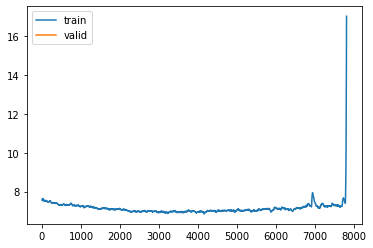

In [ ]:
learn.recorder.plot_loss()